In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Exploratory Data Analysis

In [3]:
df.shape

(2000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
df["Outcome"].value_counts() / len(df)

0    0.658
1    0.342
Name: Outcome, dtype: float64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

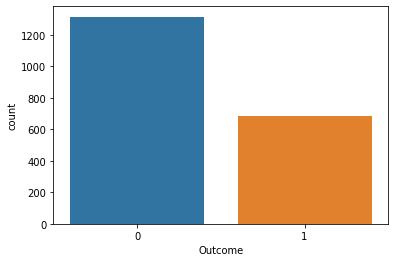

In [6]:
sns.countplot(df["Outcome"])

In [7]:
for col in df.columns:
    print(col + " : " + str(df[col].unique()))

Pregnancies : [ 2  0  1  4  8  3  6  5  7 10 12  9 11 13 15 17 14]
Glucose : [138  84 145 135 139 173  99 194  83  89 125  80 166 110  81 195 154 117
   0  94  96  75 180 130 120  91 163 122 103 102  90 111 133 106 171 159
 146  71 105 101  88 176 150  73 187 100  44 141 114 109  95 126 129  79
  62 131 112 113  74 137 136 107 123 134 142 144  92  93 151  85 155  76
 160 124  78  97 162 132 118 170 128 108  57 147 156 153 188 152 104 148
  87 179 143 119 181 158 196 184 140 177 197 164 165  86 193 191 161 167
  77 115 182 157 178 116  61 189  98 127  82  72 168 172 175  68 186 198
 121  67 183 174 199  56 169 149  65 190]
BloodPressure : [ 62  82   0  68  78  72  80  65  90  70  74  64  60  50  54  76  84  92
 110  66  56  88  58  85  86  75  48  44 108  55  96 122  30  52  98 104
  95  46 102 100  61  94  24  38 106 114  40]
SkinThickness : [ 35  31   0  42  41  32  17  28  30  38  18  15  33  19  25  39  26  23
  37  47  24  27  11  21  34  10  60  13  20  22  29  54  40  51  56  36


In [8]:
# Some features have 0 values. Let's find out these features.
continuous_features = [feature for feature in df.columns if feature not in ["Pregnancies", "Outcome"]]
for col in continuous_features:
    if 0 in df[col].values:
        print(col)

Glucose
BloodPressure
SkinThickness
Insulin
BMI


In [9]:
# Check the percentage of 0s in each column

for feature in continuous_features:
    new = df[df[feature] == 0]
    print(feature + " : " + str(len(new) / len(df)))
    

Glucose : 0.0065
BloodPressure : 0.045
SkinThickness : 0.2865
Insulin : 0.478
BMI : 0.014
DiabetesPedigreeFunction : 0.0
Age : 0.0


* Glucose, BloodPressure, SkinThickness, Insulin, BMI can not be 0, so we need te replace those values with some other values.

* Glucose,BloodPressure, BMI have only few missing values so we can replace the missing values with mean/median/mode. 
* SkinThickness and Insulin have a higher amount of missing values so we should use other techniques to handle them.

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* There are no missing values

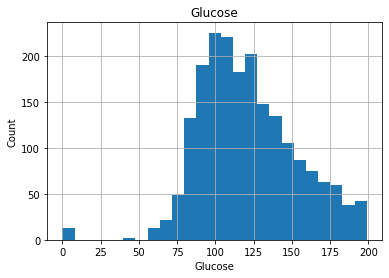

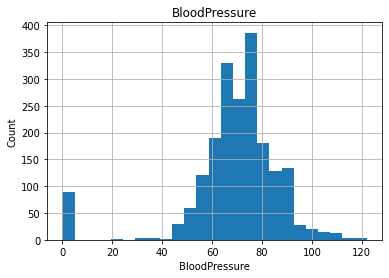

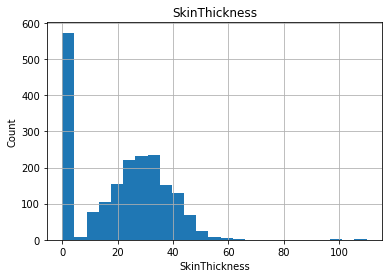

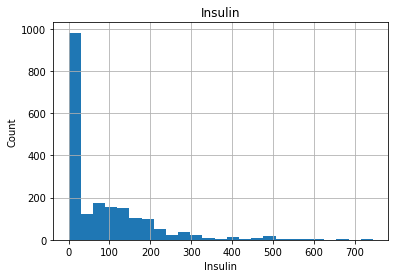

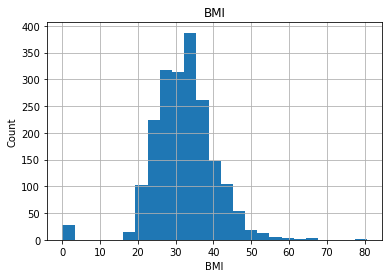

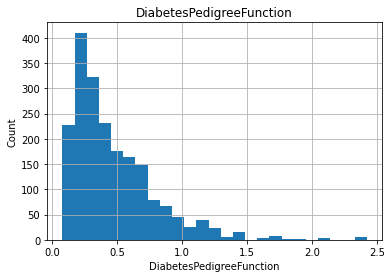

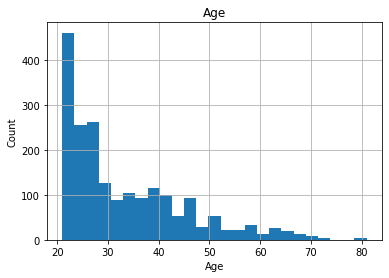

In [11]:
for feature in continuous_features:
    data=df.copy()  # create a copy to not affect the real dataframe
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [12]:
# Since data is following normal distribution i am going to replace 0 with the mean

df["Glucose"] = df["Glucose"].replace(0, df["Glucose"].mean())
df["BloodPressure"] = df["BloodPressure"].replace(0, df["BloodPressure"].mean())
df["BMI"] = df["BMI"].replace(0, df["BMI"].mean())

(array([ 10.,  46., 229., 397., 414., 326., 225., 151., 122.,  80.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <BarContainer object of 10 artists>)

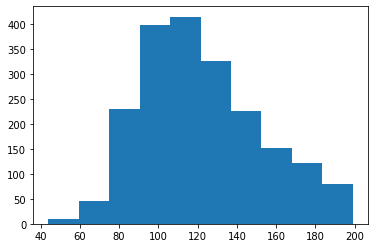

In [13]:
plt.hist(df["Glucose"])

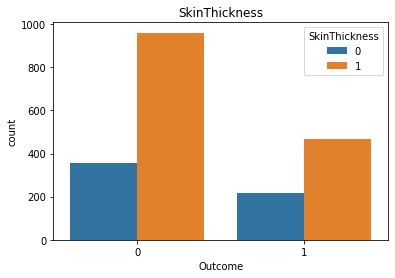

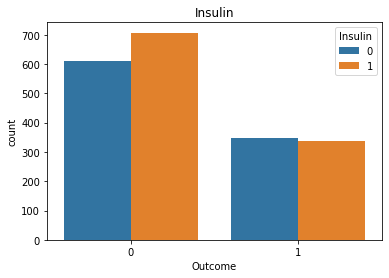

In [14]:
# Check the relationship of missing values in SkinThickness and Insulin with target feature

cols = ["SkinThickness", "Insulin"]
for feature in cols:
    data = df.copy()
    data[feature] = np.where(data[feature] == 0, 0, 1)
    sns.countplot(x="Outcome", hue=feature, data=data)  
    plt.title(feature)
    plt.show()

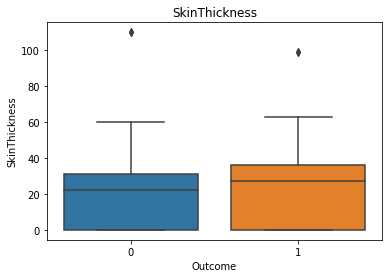

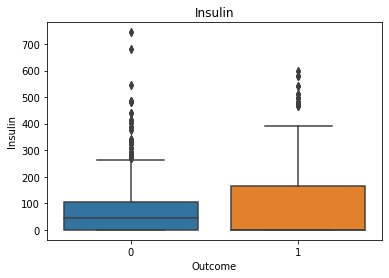

In [15]:
for feature in cols:
    data = df.copy()
    sns.boxplot(x="Outcome", y=feature, data=data)  
    plt.title(feature)
    plt.show()

In [16]:
for col in ["SkinThickness", "Insulin"]:
    df[col] = df[col].replace(0, np.nan)

In [17]:
df.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               573
Insulin                     956
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
for col in ["SkinThickness", "Insulin"]:
    df[col+"_NAN"] = np.where(df[col].isnull(),1,0)
    df[col] = df[col].fillna(df[col].median())

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_NAN,Insulin_NAN
0,2,138.0,62.0000,35.0,126.0,33.6,0.127,47,1,0,1
1,0,84.0,82.0000,31.0,125.0,38.2,0.233,23,0,0,0
2,0,145.0,69.1455,29.0,126.0,44.2,0.630,31,1,1,1
3,0,135.0,68.0000,42.0,250.0,42.3,0.365,24,1,0,0
4,1,139.0,62.0000,41.0,480.0,40.7,0.536,21,0,0,0


In [20]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
SkinThickness_NAN           0
Insulin_NAN                 0
dtype: int64

In [21]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,SkinThickness_NAN,Insulin_NAN
0,2,138.0,62.0000,35.0,126.0,33.6,0.127,47,0,1
1,0,84.0,82.0000,31.0,125.0,38.2,0.233,23,0,0
2,0,145.0,69.1455,29.0,126.0,44.2,0.630,31,1,1
3,0,135.0,68.0000,42.0,250.0,42.3,0.365,24,0,0
4,1,139.0,62.0000,41.0,480.0,40.7,0.536,21,0,0


## Multicolleniarity

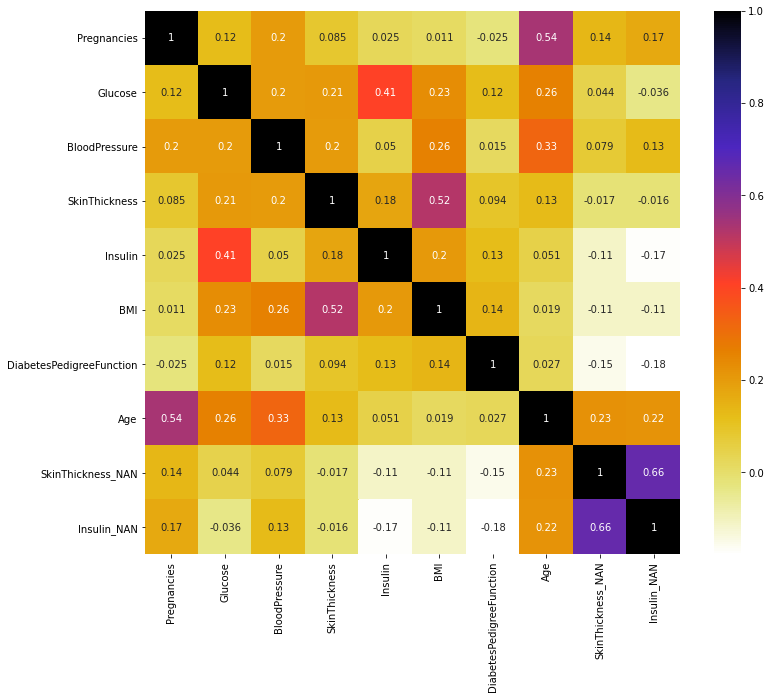

In [22]:
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

* Independent features are not correlated with each other.

## Feature Selection

In [23]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

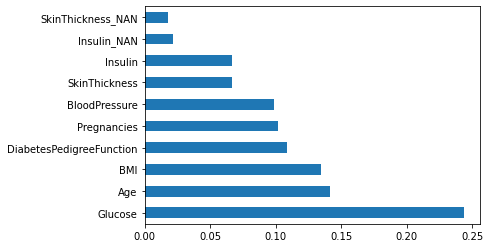

In [24]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [25]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [27]:
xgbo = xgb.XGBClassifier()
xgbo.fit(x_train, y_train)

[23:23:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
pred = xgbo.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       329
           1       0.94      0.95      0.95       171

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



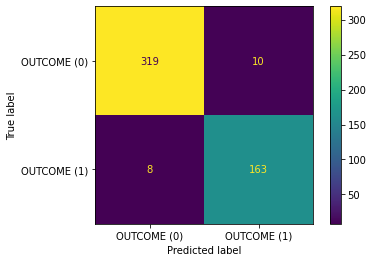

In [29]:
plot_confusion_matrix(xgbo, x_test, y_test, values_format="d", display_labels=["OUTCOME (0)", "OUTCOME (1)"])

In [30]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2, 5, 7]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 5, 8]

In [31]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [20, 110, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 8]}


In [32]:
from sklearn.model_selection import RandomizedSearchCV

search = RandomizedSearchCV(estimator = xgb.XGBClassifier(), param_distributions = random_grid,
                               scoring='roc_auc', n_iter = 10, cv = 5, 
                               verbose=2, random_state=42, n_jobs = -1)
search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.3s finished


[23:23:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:23:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [33]:
search.best_params_

{'n_estimators': 110,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 7}

In [34]:
search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              max_features='auto', min_child_weight=1, min_samples_leaf=1,
              min_samples_split=2, missing=nan, monotone_constraints='()',
              n_estimators=110, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
best_xgb = xgb.XGBClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=8, max_features="sqrt", max_depth=7)

best_xgb.fit(x_train, y_train)

[23:23:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:23:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              max_features='sqrt', min_child_weight=1, min_samples_leaf=8,
              min_samples_split=5, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
pred = best_xgb.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       329
           1       0.94      0.94      0.94       171

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



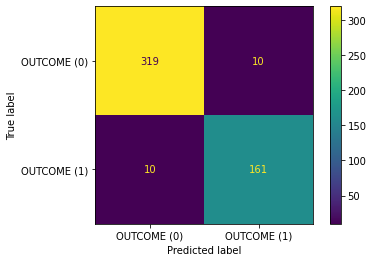

In [37]:
plot_confusion_matrix(best_xgb, x_test, y_test, values_format="d", display_labels=["OUTCOME (0)", "OUTCOME (1)"])

In [38]:
print(roc_auc_score(y_test, pred))

0.9555626655290711


In [39]:
rf = RandomForestClassifier()

search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               scoring='roc_auc', n_iter = 10, cv = 5, 
                               verbose=2, random_state=42, n_jobs = -1)
search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 5, 7],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 5, 8],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 110, 200]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [40]:
search.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=110)

In [41]:
best_rf = RandomForestClassifier(max_depth=7, n_estimators=110)
best_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=110)

In [42]:
pred = best_rf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       329
           1       0.87      0.79      0.83       171

    accuracy                           0.89       500
   macro avg       0.88      0.86      0.87       500
weighted avg       0.89      0.89      0.89       500



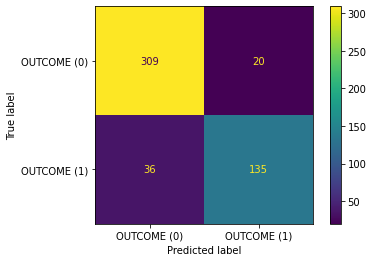

In [43]:
plot_confusion_matrix(best_rf, x_test, y_test, values_format="d", display_labels=["OUTCOME (0)", "OUTCOME (1)"])

In [44]:
print(roc_auc_score(y_test, pred))

0.8643417053271477


* XGBoost has a higher AUC score so i will select this model

In [46]:
import pickle

f = open("model.sav", "wb")
pickle.dump(best_xgb, f)

In [47]:
import pickle
f = open("model.sav", "rb")
c = pickle.load(f)
c

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              max_features='sqrt', min_child_weight=1, min_samples_leaf=8,
              min_samples_split=5, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
x_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'SkinThickness_NAN',
       'Insulin_NAN'],
      dtype='object')

In [56]:
inp = pd.DataFrame({"Pregnancies" : [0], "Glucose": [30],
                    "BloodPressure" : [30], 'SkinThickness' : 30,
                     'Insulin' : [25],
                    'BMI' : [30], 'DiabetesPedigreeFunction' : [30], 
                    'Age' : [30], 'SkinThickness_NAN' : [0],
       'Insulin_NAN' : [0] })
inp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,SkinThickness_NAN,Insulin_NAN
0,0,30,30,30,25,30,30,30,0,0


In [57]:
c.predict(inp)

array([0], dtype=int64)